<a href="https://colab.research.google.com/github/gna-rus/EXP_analysis/blob/main/EXP_create_df_Optic_TFT_RC_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Подготовка данных**

In [64]:
import pandas as pd
import numpy as np
import csv
import os
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

pd.options.mode.copy_on_write = True


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Задаю центры для виртуальных ячеек
df_with_etalon_XY = pd.DataFrame()

df_with_etalon_XY['X'] = [0, 50000,  185000,  310000, 14000,  14000,  14000, 85000, 85000, 85000, 145000, 145000, 145000, 210000, 210000, 210000, 290000, 290000, 290000, 350000, 350000, 350000, 410000, 410000, 410000]
df_with_etalon_XY['Y'] = [0, 10000,  10000,  10000,  90000,  190000,  290000, 90000, 190000, 290000, 90000, 190000, 290000, 90000, 190000, 290000, 90000,  190000, 295000, 100000,  190000, 290000, 90000, 190000, 290000]

In [146]:
# Функция для модернизации таблиц (подвязывает каждое измерение к определенной области на панели)
def fun_Num_of_square(df):
  count = 0

  X_list = list(df_with_etalon_XY['X'])
  Y_list = list(df_with_etalon_XY['Y'])

  X_df = df['X']
  Y_df = df['Y']

  l_res = []

  for k in range(len(df['X'])):
    for i in range(len(X_list)):
      # вычисляю длину вектора
      try:
        x1 = math.pow((float(X_list[i])-float(X_df.at[k])), 2)
        y1 = math.pow((float(Y_list[i])-float(Y_df.at[k])), 2)
        length_vector = math.pow((x1 + y1), 0.5)
        l_res.append(length_vector) # создаю список длин векторов
        print(1)
        min_index = l_res.index(min(l_res)) # определяю индекс в списке длин векторов (этот индекс помещается в два списка с координатами Х и У)
        print(2, min_index)
        min_X_index = X_list[min_index] # координаты самой близкой виртуальной точки
        print(3)
        min_Y_index = Y_list[min_index]
        print(4)
        df['Num_of_square'].at[k]= f'({min_X_index},{min_Y_index})'
        count += 1
      except:
        print('error')

  print(df)
  return df


  # for i in range(len(df)):
  #   for j in range(len(dict_df)):

  #     if (abs(df['X'].iloc[i] - dict_df['X'].iloc[j])<20000) and (abs(df['Y'].iloc[i] - dict_df['Y'].iloc[j])<40000):

  #       df.at[i, 'Num_of_square']=f'({dict_df["X"].loc[j]},{dict_df["Y"].loc[j]})'
  #       break

  #     if (abs(df['X'].iloc[i] - dict_df['X'].iloc[j])<40000) and (abs(df['Y'].iloc[i] - dict_df['Y'].iloc[j])<20000):

  #       df.at[i, 'Num_of_square']= f'({dict_df["X"].iloc[j]},{dict_df["Y"].iloc[j]})'
  #       break

  # return df




# **Редактирование оптических параметров**

In [67]:
# Создаю список всех адресов файлов с которым необходимо работать
list_all_adres, list_res = [], []
for root, dirs, files in os.walk('/content/drive/MyDrive/for_EXP/optic'):
    for file in files:
        if (file.endswith('.xlsx') and ('-D-CD/' not in str(file) or ('ME1-D-CD/' in str(file)))):
            list_all_adres.append(os.path.join(root, file))

for i in range(len(list_all_adres)):
  if ('-E-CD' in list_all_adres[i]) or ('ME1-D-CD/' in list_all_adres[i]):
    list_res.append(list_all_adres[i])


In [68]:
# Создаю словарь <название лота и измерения> - <ссылка на файл>
dict_of_name_and_adres = {}
for i in range(len(list_res)):
  str_of_name = list_res[i].split('/')[6:8]
  if '   ' in str_of_name[1]:
    name = str_of_name[1].replace(" ", "")[6:13] + " " + str_of_name[0]
    dict_of_name_and_adres[name] = list_res[i]
  else:
    name = str_of_name[1][:7] + " " + str_of_name[0]
    dict_of_name_and_adres[name] = list_res[i]

In [ ]:
dict_of_name_and_adres

In [70]:
# создаю словарь таблиц!
dict_of_all_df = {}
for i in dict_of_name_and_adres:
  dict_of_all_df[i] =  pd.read_excel(dict_of_name_and_adres[i])

In [71]:
# функция для автоматической корректировки таблицы оптических измерений
def fun_for_XY(row):
  list1 = row['Coordinates'].split(' ')
  row['X'] = int(list1[1][2:]) + 210000 #смещаю нулевую точку
  row['Y'] = int(list1[0][2:]) + 170000
  return row

def generate_df(df):
  """
  Удаляю лишние столбцы и строки
  """
  list_of_columns = df.columns.values.tolist()[3:]
  try:
    df = df.drop(list_of_columns, axis = 1)
    head = df.loc[2]
    df.rename(columns=head, inplace=True)
    df = df.loc[3:27].reset_index(drop=True)
    df = df.apply(fun_for_XY, axis=1)
    # df = df.drop(['Coordinates', 'CDMeasureType'], axis = 1)

  except:
    print(f'error {df.info()}')
  return df

In [72]:
new_dict_of_all_df = {}

for i in dict_of_all_df:
  new_df = pd.DataFrame()
  new_df = generate_df(dict_of_all_df[i]) # отправляю каждое значение словаря таблиц на модернизацию

  new_dict_of_all_df[i] = new_df

In [ ]:
new_dict_of_all_df['EXP65-3 IGZO-E-CD']

In [74]:
# Анализ значения line для IGZO_E_CD
def inspection_IGZO_E_CD(df):
  mean_line = 5.5 # среднее значение
  diff_line = 1.5 # критическое отклонение

  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_IGZO_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для ME1_E_CD
def inspection_ME1_E_CD(df):
  mean_line = 5.1
  diff_line = 0.9
  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_ME1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для SD1_E_CD
def inspection_SD1_E_CD(df):
  mean_line = 4.8
  diff_line = 0.9
  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_SD1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

# Анализ значения line для VI1_E_CD
def inspection_VI1_E_CD(df):
  mean_line = 7.1
  diff_line = 2.4
  res = mean_line - float(df['Line'])
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_VI1_E_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df


# Анализ значения line для ME1_E_CD
def inspection_ME1_D_CD(df):
  mean_line = 5.9
  diff_line = 1.2
  res = mean_line -  df['Line']
  if abs(res) > diff_line:
    df['result'] = 0
  else:
    df['result'] = 1
  df['err_result'] = res
  df['line_ME1_D_CD'] = df['Line']
  # df['err_result'].fillna(0)
  return df

In [ ]:
new_dict_of_all_df.keys()

In [76]:
# Создаю колонку средних значений для каждой группы оптических измерений по всей подложке (в рамках одного типа измерений)
for i in new_dict_of_all_df:
  new_dict_of_all_df[i][f'res_mean_on_glass_{i.split(" ")[1]}'] = new_dict_of_all_df[i]['Line'].astype(float).mean() # вывожу среднее значение по всему стеклу
  new_dict_of_all_df[i]['Line'] = new_dict_of_all_df[i]['Line'].astype(float)

In [ ]:
new_dict_of_all_df['EXP72-4 SD1-E-CD']

In [ ]:
# Модернизирую таблицы с оптических измерениями и привожу их к единой матрице координат для мержевания
for i in new_dict_of_all_df:
  new_dict_of_all_df[i]['Num_of_square'] = "0"
  new_dict_of_all_df[i] = fun_Num_of_square(new_dict_of_all_df[i])

In [ ]:
# Провожу анализ и присваиваю OK (1) или NG (0) по каждому измерению
for i in new_dict_of_all_df:
  new_dict_of_all_df[i]['result'] = ' '
  new_dict_of_all_df[i]['err_result'] = 0
  if 'SD1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_SD1_E_CD, axis=1)

  if 'VI1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_VI1_E_CD, axis=1)

  elif 'ME1-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_ME1_E_CD, axis=1)

  elif 'ME1-D-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_ME1_D_CD, axis=1)

  elif 'IGZO-E-CD' in i:
    new_dict_of_all_df[i] = new_dict_of_all_df[i].apply(inspection_IGZO_E_CD, axis=1)



In [ ]:
# Переименовываю колонки в таблица, добавляю столбец для дальнейшего слияния с таблицей с электро измерениям
def rename_drop_df_optic(df, name):
  list_name = name.split()
  result_name = f"result_{list_name[1]}"
  err_resulte_name =  f"err_result_{list_name[1]}"

  df = df.drop(['X', 'Y', 'Coordinates', 'CDMeasureType'], axis=1).rename(columns={"result": result_name, 'err_result': err_resulte_name})
  df['Lot-panel'] = list_name[0]
  return df

for i in new_dict_of_all_df:
  new_dict_of_all_df[i] = rename_drop_df_optic(new_dict_of_all_df[i], i)

In [ ]:
result = pd.DataFrame()
result_optic = []

for i in new_dict_of_all_df:
  result_optic.append(new_dict_of_all_df[i])

result = pd.concat(result_optic, ignore_index=True)
result

In [ ]:
def correct_position(df):
  mean = df['result_SD1-E-CD']
  df = df.drop('result_SD1-E-CD', axis=1)
  df.insert(4, 'result_SD1-E-CD', mean)

  lot = df['Lot-panel']
  df = df.drop('Lot-panel', axis=1)
  df.insert(0, 'Lot-panel', lot)

  return df

result = correct_position(result)
result

In [ ]:
result[(result['Lot-panel'] == 'EXP65-3') & (result['Num_of_square'] == '(185000,10000)')]

In [ ]:
# создаю таблицу только с теми данными что мне в дальнейшем необходимы
result_v2 = result[['Lot-panel', 'Num_of_square', 'line_SD1_E_CD', 'result_SD1-E-CD', 'line_ME1_D_CD', 'result_ME1-D-CD', 'line_IGZO_E_CD', 'result_IGZO-E-CD', 'line_VI1_E_CD', 'result_VI1-E-CD', 'line_ME1_E_CD', 'result_ME1-E-CD']].drop_duplicates()
result_v2

In [ ]:
# Трансформирую колонки по LOt и Num_of_square
def transform_Num_of_square_LOT_panel(df):
  list_line_SD1_E_CD = list(df['line_SD1_E_CD'].unique())
  list_result_SD1_E_CD = list(df['result_SD1-E-CD'].unique())

  list_line_ME1_D_CD = list(df['line_ME1_D_CD'].unique())
  list_result_ME1_D_CD = list(df['result_ME1-D-CD'].unique())

  list_line_IGZO_E_CD = list(df['line_IGZO_E_CD'].unique())
  list_result_IGZO_E_CD = list(df['result_IGZO-E-CD'].unique())

  list_line_VI1_E_CD = list(df['line_VI1_E_CD'].unique())
  list_result_VI1_E_CD = list(df['result_VI1-E-CD'].unique())

  list_line_ME1_E_CD = list(df['line_ME1_E_CD'].unique())
  list_result_ME1_E_CD = list(df['result_ME1-E-CD'].unique())


  df['line_SD1_E_CD'] = list_line_SD1_E_CD[1] if (np.isnan(list_line_SD1_E_CD[0]) and (len(list_line_SD1_E_CD)==2)) else list_line_SD1_E_CD[0]
  df['result_SD1-E-CD'] = list_result_SD1_E_CD[1] if (np.isnan(list_result_SD1_E_CD[0]) and (len(list_result_SD1_E_CD)==2)) else list_result_SD1_E_CD[0]

  df['line_ME1_D_CD'] = list_line_ME1_D_CD[1] if (np.isnan(list_line_ME1_D_CD[0]) and (len(list_line_ME1_D_CD)==2)) else list_line_ME1_D_CD[0]
  df['result_ME1-D-CD'] = list_result_ME1_D_CD[1] if (np.isnan(list_result_ME1_D_CD[0]) and (len(list_result_ME1_D_CD)==2)) else list_result_ME1_D_CD[0]

  df['line_IGZO_E_CD'] = list_line_IGZO_E_CD[1] if (np.isnan(list_line_IGZO_E_CD[0]) and (len(list_line_IGZO_E_CD)==2)) else list_line_IGZO_E_CD[0]
  df['result_IGZO-E-CD'] = list_result_IGZO_E_CD[1] if (np.isnan(list_result_IGZO_E_CD[0]) and (len(list_result_IGZO_E_CD)==2)) else list_result_IGZO_E_CD[0]

  df['line_VI1_E_CD'] = list_line_VI1_E_CD[1] if (np.isnan(list_line_VI1_E_CD[0]) and (len(list_line_VI1_E_CD)==2)) else list_line_VI1_E_CD[0]
  df['result_VI1-E-CD'] = list_result_VI1_E_CD[1] if (np.isnan(list_result_VI1_E_CD[0]) and (len(list_result_VI1_E_CD)==2)) else list_result_VI1_E_CD[0]

  df['line_ME1_E_CD'] = list_line_ME1_E_CD[1] if (np.isnan(list_line_ME1_E_CD[0]) and (len(list_line_ME1_E_CD)==2)) else list_line_ME1_E_CD[0]
  df['result_ME1-E-CD'] = list_result_ME1_E_CD[1] if (np.isnan(list_result_ME1_E_CD[0]) and (len(list_result_ME1_E_CD)==2)) else list_result_ME1_E_CD[0]

  return df


# Переношу значения Measurement Structure в новые колонки
def Filling_columns_of_Optic_result(df):
  result_df = pd.DataFrame()
  list_lot = list(df['Lot-panel'].unique())
  list_PEM = list(df['Num_of_square'].unique())
  for i in list_lot:
    for j in list_PEM:
      df_timer = df[(df['Lot-panel']==i) & (df['Num_of_square']==j)]
      df_timer = transform_Num_of_square_LOT_panel(df_timer)
      result_df = pd.concat([result_df, df_timer], axis=0)
  return result_df

result_fill = Filling_columns_of_Optic_result(result_v2)

In [ ]:
# Нахожу nan и заменяю их на -1
def fill_nan_to(df):
  for i in df:
    df[i] = df[i].fillna(-1)
  return df


result_fill = fill_nan_to(result_fill).drop_duplicates()

In [ ]:
result_fill.sample(10)

 # **Загрузка TFT и RC**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [27]:
# Загружаю файлы
df_RC = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO RC Database Ref4-5.csv', encoding = 'windows-1251')
df_RC_SiN200N = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO RC Database Data Ref4 + SiNx 200nm Nominal.csv', encoding = 'windows-1251')

df_TFT = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO TFT Database Data Ref4-5.csv',  encoding = 'windows-1251')
df_TFT_SiN200N = pd.read_csv('/content/drive/MyDrive/for_EXP/IGZO TFT Database Data Ref4 + SiNx 200nm Nominal.csv',  encoding = 'windows-1251')

df_TFT = df_TFT.rename(columns = {'п»їDate and time' : 'Date and time', 'Р РµС†РµРїС‚':'Type_Material'}) # переименовываю столбец
df_TFT_SiN200N = df_TFT_SiN200N.rename(columns = {'п»їDate and time' : 'Date and time'}) # переименовываю столбец.columns

df_RC = df_RC.rename(columns = {'X_PRB' : 'X', 'Y_PRB' : 'Y'})
df_RC_SiN200N = df_RC_SiN200N.rename(columns = {'X_PRB' : 'X', 'Y_PRB' : 'Y'})


In [28]:
df_RC = df_RC[df_RC['Description'] == 'Reference 4']
df_TFT = df_TFT[df_TFT['Description'] == 'Reference 4']

# **Модернизирую таблицу**

In [29]:
# Удаляю все лишние колонки
def clean_TFT(df):
    df = df.drop(['Date and time', 'Р\xa0РµС†РµРїС‚','XPEM', 'YPEM', 'Rtot2', 'Rtot3',
       'Rtot4', 'Gate Ox leakage',  'IGZO Serpentine', 'Line gate', 'Lot', 'Source Table 2',
       'Line gate SEMIA', 'Line SD', 'Line SEMIA','L', 'VIA SD-GATE',
       'VIA SD-SEMIA', 'vt', 'von or vt', 'Cni/Cox', 'Line Gate-SEMIA',
       'IGZO Serpantine', 'VIA Gate-SD', 'VIA SEMIA', 'Id/meanId',
       'Cox/meanCox', 'Cox/Cni', 'SQL', 'key for uniformity', 'PEM 24 points',
       'uniformity for Von', 'Id(Von+2V) filter', 'uniformity for Id(Von+2V)',
       'Id(Von+3V) filter', 'uniformity for Id(Von+3V)', 'uniformity for Hyst',
       'SQL 2', 'SQL 3', 'SQL 4', 'SQL 5', 'SQL 6', 'SQL 7','Id(Von+1V)', 'Id(Von+2V)',
       'Id(Von+4V)', 'Panel'], axis = 1)

    if 'SQL 8' in df.columns:
      df = df.drop('SQL 8', axis = 1)

    if 'SQL 9' in df.columns:
      df = df.drop('SQL 9', axis = 1)

    return df

df_TFT_clean = clean_TFT(df_TFT)
df_TFT_SiN200N_clean = clean_TFT(df_TFT_SiN200N)

In [30]:
# Удаляю все лишние колонки
def clean_RC(df):
    return df.drop(['Index', 'Platform', 'LOT', 'Panel', 'Layer',
                          'Measured value', 'Key', 'Measurement settings', '# of VIAs', 'L_Design', 'W_Design',
                          'TFT Performance', 'Measurement date','PEM 24 points', 'Panel'], axis = 1)

df_RC_clean = clean_RC(df_RC)
df_RC_SiN200N_clean = clean_RC(df_RC_SiN200N)

In [31]:
# изменяю тип переменных на float64 в TFT таблице 'Cni', 'Cox'
def convert_TFT_to_float64(df):

  try:
    df['Id(Von+3V)'] = df['Id(Von+3V)'].str.replace(',', '.').astype('float64')
    df['Von'] = df['Von'].str.replace(',', '.').astype('float64')
    df['Hyst'] = df['Hyst'].str.replace(',', '.').astype('float64')
    df['SS'] = df['SS'].str.replace(',', '.').astype('float64')
    df['Ioff'] = df['Ioff'].str.replace(',', '.').astype('float64')
    df['Cni'] = df['Cni'].str.replace(',', '.').astype('float64')
    df['Cox'] = df['Cox'].str.replace(',', '.').astype('float64')
  except:
    print('error')
  return df

df_TFT_clean = convert_TFT_to_float64(df_TFT_clean)
df_TFT_SiN200N_clean = convert_TFT_to_float64(df_TFT_SiN200N_clean)

In [32]:
# изменяю тип переменных на float64  в RC таблице
def convert_RC_to_float64(df):
  try:
    df['Capasitance'] = df['Capasitance'].str.replace(',', '.').astype('float64')
    df['Resistance'] = df['Resistance'].str.replace(',', '.').astype('float64')
    df['Sheet resistance'] = df['Sheet resistance'].str.replace(',', '.').astype('float64')
  except:
    print('error')
  return df

df_RC_clean = convert_RC_to_float64(df_RC_clean)
df_RC_SiN200N_clean = convert_RC_to_float64(df_RC_SiN200N_clean)

error


In [33]:
df_TFT_clean.sample(5)

,PEM,X,Y,Lot-panel,Description,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
340,X2-Y46,14462,61164,EXP72-2,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,-1.000930,0.000020,7.948000e-07,0.365761,1.464752e-13,16.17,41.58
146,X22-Y20,214442,217174,EXP65-3,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,0.200433,-0.000057,8.375790e-07,0.219825,NaN,16.23,NaN
108,X15-Y45,144454,67234,EXP65-1,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,0.500185,0.200019,8.134885e-07,0.158719,NaN,15.97,NaN
45,X35-Y55,347224,8826,EXP65-2,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.900740,0.200241,7.350655e-07,0.183370,NaN,17.05,NaN
78,X29-Y27,287234,176816,EXP65-4,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-1.500785,0.200050,7.778215e-07,0.273543,NaN,16.11,NaN


In [34]:
df_TFT_SiN200N_clean.sample(5)

,PEM,X,Y,Lot-panel,Description,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
213,X9-Y55,87244,8836,EXP80-1,Reference 4 +SiNx 200nm,Nominal,Linear,Vd=1V,220C 30 min,-1.800705,0.000010,1.096795e-06,0.343278,1.746028e-13,NaN,NaN
10,X29-Y27,287234,176816,EXP69-3,Reference 4 +SiNx 200nm,Nominal,Linear,Vd=1V,220C 30 min,-0.100781,0.200045,5.012055e-07,0.207219,NaN,30.56,29.11
125,X30-Y12,297222,266766,EXP74-4,Reference 4 +SiNx 200nm,Nominal,Linear,Vd=1V,220C 30 min,0.300303,0.199857,7.263835e-07,0.346532,1.395853e-13,NaN,NaN
132,X16-Y28,157242,170786,EXP74-4,Reference 4 +SiNx 200nm,Nominal,Linear,Vd=1V,220C 30 min,0.099782,0.201128,6.534460e-07,0.368976,1.476328e-13,NaN,NaN
190,X9-Y55,87244,8836,EXP75-2,Reference 4 +SiNx 200nm,Nominal,Linear,Vd=1V,220C 30 min,0.099824,0.201151,9.133475e-07,0.302300,1.478698e-13,NaN,NaN


In [35]:
# присвоение Num_of_square каждому измерению, за счет вычисления длины вектора
# (от каждой точки к Num_of_square протягивается вектор и там где она минимальная к той точке Num_of_square приписывается)
def fun_Num_of_square(df):
  X_list = list(df_with_etalon_XY['X'])
  Y_list = list(df_with_etalon_XY['Y'])

  X_df = df['X']
  Y_df = df['Y']

  l_res = []

  for i in range(len(X_list)):
    # вычисляю длину вектора
    x1 = math.pow((X_list[i]-X_df), 2)
    y1 = math.pow((Y_list[i]-Y_df), 2)
    length_vector = math.pow((x1 + y1), 0.5)
    l_res.append(length_vector) # создаю список длин векторов
  if min(l_res) > 40000:
  min_index = l_res.index(min(l_res)) # определяю индекс в списке длин векторов (этот индекс помещается в два списка с координатами Х и У)
  min_X_index = X_list[min_index] # координаты самой близкой виртуальной точки
  min_Y_index = Y_list[min_index]

  df['Num_of_square'] = f'({min_X_index},{min_Y_index})'
  return df


###
# Алгоритм присвоения каждому измерению на панели координаты одной из ячейки матрицы созданной ранее
###

df_RC_SiN200N_clean['Num_of_square'] = ''
df_RC_clean['Num_of_square'] = ''
df_TFT_SiN200N_clean['Num_of_square'] = ''
df_TFT_clean['Num_of_square'] = ''

# df_RC_SiN200N_clean_Num = fun_Num_of_square(df_RC_SiN200N_clean, df_with_etalon_XY)

# df_RC_clean_Num = fun_Num_of_square(df_RC_clean, df_with_etalon_XY)

# df_TFT_SiN200N_clean_Num = fun_Num_of_square(df_TFT_SiN200N_clean, df_with_etalon_XY)

# df_TFT_clean_Num = fun_Num_of_square(df_TFT_clean, df_with_etalon_XY)


df_RC_SiN200N_clean_Num = df_RC_SiN200N_clean.apply(fun_Num_of_square, axis=1)
df_TFT_SiN200N_clean_Num = df_TFT_SiN200N_clean.apply(fun_Num_of_square, axis=1)

df_RC_clean_Num = df_RC_clean.apply(fun_Num_of_square, axis=1)
df_TFT_clean_Num = df_TFT_clean.apply(fun_Num_of_square, axis=1)

341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439 332798
344439 332798
343631 332021
343631 332021
343631 332021
347033 331999
344841 330409
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439 332798
344439 332798
343631 332021
343631 332021
343631 332021
347033 331999
344841 330409
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439 332798
344439 332798
343631 332021
343631 332021
343631 332021
347033 331999
344841 330409
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439 332798
344439 332798
343631 332021
343631 332021
343631 332021
347033 331999
344841 330409
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439 332798
344439 332798
343631 332021
343631 332021
343631 332021
347033 331999
344841 330409
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
341643 332810
344439

In [36]:
df_RC_SiN200N_clean_Num[(df_RC_SiN200N_clean_Num['Panel index']=='EXP80-1') & (df_RC_SiN200N_clean_Num['PEM']=='X35-Y55')]

,Panel index,Description,Bake,X_SUSS,Y_SUSS,PEM,X,Y,Measurement Structure,S_Design,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Num_of_square
2782,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor SD-GATE,22000.0,31.8,NaN,NaN,NaN,NaN,"(310000,10000)"
2783,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor GATE-SEMIA,98770.0,27.8,NaN,NaN,NaN,NaN,"(310000,10000)"
2784,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor GATE-SEMIA,43950.0,29.7,NaN,NaN,NaN,NaN,"(310000,10000)"
2785,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor GATE-SEMIA,22000.0,31.2,NaN,NaN,NaN,NaN,"(310000,10000)"
2786,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor GATE-SEMIA,11000.0,33.2,NaN,NaN,NaN,NaN,"(310000,10000)"
2787,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,146418,-159910,X35-Y55,341643,8820,Capacitor GATE-SEMIA,5500.0,36.4,NaN,NaN,NaN,NaN,"(310000,10000)"
2788,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,149214,-159922,X35-Y55,344439,8808,Line GATE,NaN,NaN,"2,7",NaN,NaN,NaN,"(310000,10000)"
2789,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,149214,-159922,X35-Y55,344439,8808,Line SD,NaN,NaN,"0,2",NaN,NaN,NaN,"(310000,10000)"
2790,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,148406,-160699,X35-Y55,343631,8031,Line SEMIA,NaN,NaN,"1414,8",NaN,NaN,NaN,"(310000,10000)"
2791,EXP80-1,Reference 4 +SiNx 200nm,220C 30 min,148406,-160699,X35-Y55,343631,8031,Line GATE-SEMIA,NaN,NaN,"47394067,8",NaN,NaN,NaN,"(310000,10000)"


In [37]:
df_TFT_clean_Num

,PEM,X,Y,Lot-panel,Description,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square
0,X35-Y1,347224,332816,EXP65-1,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.200860,0.000019,1.074195e-06,0.201133,NaN,16.79,NaN,"(350000,290000)"
1,X8-Y2,77242,326776,EXP65-1,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.500634,0.200014,1.420845e-06,0.168814,NaN,16.44,NaN,"(85000,290000)"
2,X2-Y12,17252,266766,EXP65-1,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.000836,0.000055,1.590820e-06,0.203071,NaN,16.39,NaN,"(14000,290000)"
3,X16-Y12,157232,266787,EXP65-1,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.300719,0.199902,1.172290e-06,0.229483,NaN,16.08,NaN,"(145000,290000)"
4,X30-Y12,297222,266766,EXP65-1,Reference 4,Nominal,Linear,Vd=1V,220C 30 min,-0.000777,-0.000038,7.953080e-07,0.258713,NaN,16.54,NaN,"(290000,295000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,X2-Y46,14462,61164,EXP72-2,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,-1.000930,0.000020,7.948000e-07,0.365761,1.464752e-13,16.17,41.58,"(14000,90000)"
341,X42-Y46,414422,61174,EXP72-2,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,-1.300795,0.199830,3.111310e-07,0.429412,1.548779e-13,16.97,33.48,"(410000,90000)"
342,X22-Y54,214442,13184,EXP72-2,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,-1.300815,0.199930,2.982330e-07,0.411107,1.499645e-13,16.19,35.45,"(185000,10000)"
343,X9-Y55,84454,7234,EXP72-2,Reference 4,W10L5A,Linear,Vd=1V,220C 30 min,-0.900729,0.200223,5.473700e-07,0.341037,1.513375e-13,16.22,39.86,"(50000,10000)"


In [38]:
# Создаю новые колонки для RC

list_Measurement_Structure = list(df_RC_SiN200N_clean['Measurement Structure'].unique())
def new_colums_for_RC(df):
  df['Capacitor GATE-SEMIA'] = 0
  df['Capacitor SD-GATE'] = 0
  df['Line GATE'] = 0
  df['Line SD'] = 0
  df['Line SEMIA'] = 0
  df['Line GATE-SEMIA'] = 0
  df['VIA SD-GATE'] = 0
  df['VIA SD-SEMIA'] = 0
  df['IGZO Serpentine'] = 0
  return df

df_RC_SiN200N_clean_Num = new_colums_for_RC(df_RC_SiN200N_clean_Num)
df_RC_clean_Num = new_colums_for_RC(df_RC_clean_Num)


In [39]:
df_RC_clean_Num.sample(5)

,Panel index,Description,Bake,X_SUSS,Y_SUSS,PEM,X,Y,Measurement Structure,S_Design,Capasitance,Sheet resistance,VIA resistance,Resistance,Leakage current,Num_of_square,Capacitor GATE-SEMIA,Capacitor SD-GATE,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,IGZO Serpentine
1185,EXP69-1,Reference 4,220C 30 min,149214,164068,X35-Y1,344439,332798,Line SD,NaN,NaN,0.3,NaN,NaN,NaN,"(350000,290000)",0,0,0,0,0,0,0,0,0
907,EXP65-4,Reference 4,220C 30 min,148406,163291,X35-Y1,343631,332021,VIA SD-GATE,NaN,NaN,NaN,2.0,NaN,NaN,"(350000,290000)",0,0,0,0,0,0,0,0,0
1158,EXP65-4,Reference 4,220C 30 min,16426,-153950,X22-Y54,211651,14780,Capacitor GATE-SEMIA,5500.0,41.5,NaN,NaN,NaN,NaN,"(185000,10000)",0,0,0,0,0,0,0,0,0
1169,EXP65-4,Reference 4,220C 30 min,-113562,-159900,X9-Y55,81663,8830,Capacitor GATE-SEMIA,22000.0,40.3,NaN,NaN,NaN,NaN,"(50000,10000)",0,0,0,0,0,0,0,0,0
2312,EXP72-2,Reference 4,220C 30 min,-183554,-105970,X2-Y46,11671,62760,Capacitor GATE-SEMIA,22000.0,41.6,NaN,NaN,NaN,NaN,"(14000,90000)",0,0,0,0,0,0,0,0,0


# **Заполняю столбцы RC в зависемости от значения Measurement_Structure**

In [40]:
# Функции для присвоения по PEM и LOT
def transform_Sheet_resistance(df):
  return df

def transform_VIA_resistance(df):
  return df

def transform_Resistance(df):
  return df

def transform_Capacitor(df):
  return df

def transform_Capacitor_GATE_SEMIA(df):
  return df

# Функция принимает кусок таблицы (с единым Lot и Pem) для заполнения колонок
def transform_PEM_LOT_panel(df):
  df = df.reset_index()
  for i in range(len(df)):

    colomn = df.loc[i, 'Measurement Structure']

    if colomn in ['Line GATE', 'Line SD', 'Line SEMIA', 'Line GATE-SEMIA']:
      df[colomn] = transform_Sheet_resistance(df.loc[i, 'Sheet resistance'])

    if colomn in ['VIA SD-GATE', 'VIA SD-SEMIA']:
      df[colomn] = transform_VIA_resistance(df.loc[i, 'VIA resistance'])

    if colomn in ['IGZO Serpentine']:
      df[colomn] = transform_Resistance(df.loc[i, 'Resistance'])

    if colomn in ['Capacitor SD-GATE']:
      df[colomn] = transform_Capacitor(df.loc[i, 'Capasitance'])

    if colomn in ['Capacitor GATE-SEMIA']:
      if   df.loc[i, 'S_Design'] == 22000:
        df[colomn] = transform_Capacitor_GATE_SEMIA(df.loc[i, 'Capasitance'])
  return df


# Переношу значения Measurement Structure в новые колонки
def Measurement_Structure_in_columns(df):
  result_df = pd.DataFrame()
  list_lot = list(df['Panel index'].unique())
  list_PEM = list(df['PEM'].unique())
  for i in list_lot:
    for j in list_PEM:
      df_timer = df[(df['Panel index']==i) & (df['PEM']==j)]

      df_timer = transform_PEM_LOT_panel(df_timer)

      result_df = pd.concat([result_df, df_timer], axis=0)
  return result_df


# df_RC_SiN200N_clean_Num_colomns = df_RC_SiN200N_clean_Num.apply(Measurement_Structure_in_columns, axis=1)
df_RC_SiN200N_clean_Num_colomns = Measurement_Structure_in_columns(df_RC_SiN200N_clean_Num)
df_RC_clean_Num_colomns = Measurement_Structure_in_columns(df_RC_clean_Num)

In [41]:
# Оставляю только необходимые колонки
df_RC_SiN200N_clean_Num_colomns_res = df_RC_SiN200N_clean_Num_colomns[['Panel index', 'PEM', 'Description', 'Num_of_square', 'X', 'Y','Line GATE', 'Line SD', 'Line SEMIA', 'Line GATE-SEMIA', 'VIA SD-GATE', 'VIA SD-SEMIA', 'Capacitor GATE-SEMIA', 'Capacitor SD-GATE', 'IGZO Serpentine']].drop_duplicates()
df_RC_clean_Num_colomns_res = df_RC_clean_Num_colomns[['Panel index', 'PEM', 'Description', 'Num_of_square', 'X', 'Y','Line GATE', 'Line SD', 'Line SEMIA', 'Line GATE-SEMIA', 'VIA SD-GATE', 'VIA SD-SEMIA', 'Capacitor GATE-SEMIA', 'Capacitor SD-GATE', 'IGZO Serpentine']].drop_duplicates()

In [42]:
df_RC_SiN200N_clean_Num_colomns_res

,Panel index,PEM,Description,Num_of_square,X,Y,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine
0,EXP69-3,X35-Y1,Reference 4 +SiNx 200nm,"(350000,290000)",341643,332810,"2,7","0,4","1381,4","67705593,2",2.0,877.0,36.9,31.2,1579130.0
6,EXP69-3,X35-Y1,Reference 4 +SiNx 200nm,"(350000,290000)",344439,332798,"2,7","0,4","1381,4","67705593,2",2.0,877.0,36.9,31.2,1579130.0
8,EXP69-3,X35-Y1,Reference 4 +SiNx 200nm,"(350000,290000)",343631,332021,"2,7","0,4","1381,4","67705593,2",2.0,877.0,36.9,31.2,1579130.0
11,EXP69-3,X35-Y1,Reference 4 +SiNx 200nm,"(350000,290000)",347033,331999,"2,7","0,4","1381,4","67705593,2",2.0,877.0,36.9,31.2,1579130.0
12,EXP69-3,X35-Y1,Reference 4 +SiNx 200nm,"(350000,290000)",344841,330409,"2,7","0,4","1381,4","67705593,2",2.0,877.0,36.9,31.2,1579130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,EXP80-1,X35-Y55,Reference 4 +SiNx 200nm,"(310000,10000)",341643,8820,"2,7","0,2","1414,8","47394067,8",2.0,803.0,31.2,31.8,1540840.0
6,EXP80-1,X35-Y55,Reference 4 +SiNx 200nm,"(310000,10000)",344439,8808,"2,7","0,2","1414,8","47394067,8",2.0,803.0,31.2,31.8,1540840.0
8,EXP80-1,X35-Y55,Reference 4 +SiNx 200nm,"(310000,10000)",343631,8031,"2,7","0,2","1414,8","47394067,8",2.0,803.0,31.2,31.8,1540840.0
11,EXP80-1,X35-Y55,Reference 4 +SiNx 200nm,"(310000,10000)",347033,8009,"2,7","0,2","1414,8","47394067,8",2.0,803.0,31.2,31.8,1540840.0


In [62]:
df_RC_SiN200N_clean_Num_colomns_res = df_RC_SiN200N_clean_Num_colomns_res.rename(columns={'Panel index': 'Lot-panel'})
df_RC_clean_Num_colomns_res = df_RC_clean_Num_colomns_res.rename(columns={'Panel index': 'Lot-panel'})

# **График**

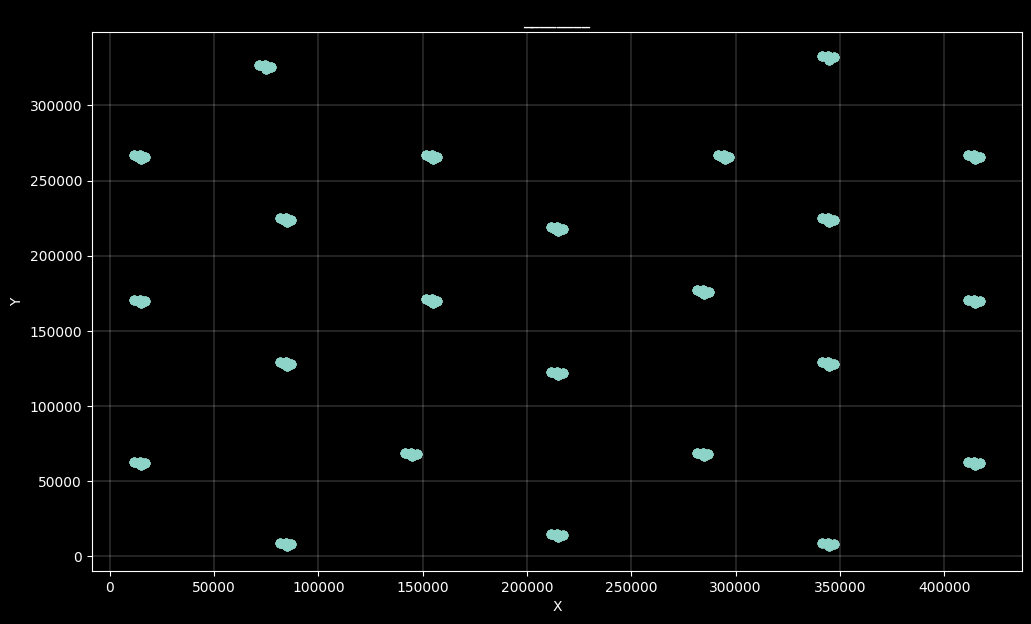

In [63]:
plt.figure(figsize=(12, 7))
plt.scatter(df_RC_clean_Num_colomns_res['X'], df_RC_clean_Num_colomns_res['Y'])

plt.title('________')
plt.grid(linewidth=0.2)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# **Объединяют TFT и RC**

In [44]:
df_RC_SiN200N_clean_Num_colomns_res['Description'].value_counts()

Description
Reference 4 +SiNx 200nm    1075
Name: count, dtype: int64

In [45]:
df_merge_RC_TFT_Ref4_SiN200N = pd.DataFrame()
df_merge_RC_TFT_Ref4_SiN200N = df_RC_SiN200N_clean_Num_colomns_res.merge(df_TFT_SiN200N_clean,  on=['Lot-panel', 'PEM'], how='inner').drop(['Num_of_square_y', 'Description_y', 'X_x', 'Y_x', 'X_y', 'Y_y'], axis = 1).drop_duplicates()

In [46]:
df_merge_RC_TFT_Ref4_SiN200N['Von']

0       -0.300706
5        0.300279
10     -10.000000
15       0.099814
20       0.099751
          ...    
1050    -1.200825
1055    -1.100835
1060    -1.100855
1065    -1.800705
1070    -1.200815
Name: Von, Length: 215, dtype: float64

In [47]:
df_merge_RC_TFT_Ref4 = pd.DataFrame()
df_merge_RC_TFT_Ref4 = df_RC_clean_Num_colomns_res.merge(df_TFT_clean_Num,  on=['Lot-panel', 'PEM'], how='inner').drop(['Num_of_square_y', 'Description_y', 'X_x', 'Y_x', 'X_y', 'Y_y'], axis = 1).drop_duplicates()

In [48]:
len(df_merge_RC_TFT_Ref4[df_merge_RC_TFT_Ref4['TFT'] == 'Nominal'])

137

# **Объединяют TFT-RC с Оптическими данными**

In [49]:
result_fill['Num_of_square'].value_counts()

Num_of_square
(0,0)              15
(350000,190000)    15
(145000,290000)    15
(410000,290000)    15
(14000,290000)     15
                   ..
(210000,90000)     15
(85000,90000)      15
0                  15
(310000,10000)     15
(290000,295000)    15
Name: count, Length: 25, dtype: int64

In [50]:
# df_merge_RC_TFT_Ref4_SiN200N
# df_merge_RC_TFT_Ref4
# result
# ПЕреименовываю столбцы для одтотипности
df_merge_RC_TFT_Ref4_SiN200N = df_merge_RC_TFT_Ref4_SiN200N.rename(columns={'Num_of_square_x': 'Num_of_square'})
df_merge_RC_TFT_Ref4 = df_merge_RC_TFT_Ref4.rename(columns={'Num_of_square_x': 'Num_of_square'})

In [51]:
df_merge_RC_TFT_Ref4_SiN200N.sample(3)

,Lot-panel,PEM,Description_x,Num_of_square,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
90,EXP69-3,X29-Y45,Reference 4 +SiNx 200nm,"(290000,90000)","2,7","0,4","1191,1","60503559,3",2.0,965.0,13.9,30.7,1359360.0,Nominal,Linear,Vd=1V,220C 30 min,-0.300725,0.199883,3.618455e-07,0.235090,NaN,30.71,13.88
715,EXP74-4,X35-Y55,Reference 4 +SiNx 200nm,"(310000,10000)","2,4","0,3","1420,8","78989830,5",2.0,906.0,19.6,31.2,1552820.0,Nominal,Linear,Vd=1V,220C 30 min,0.099788,0.201254,5.692320e-07,0.399622,4.858860e-13,NaN,NaN
260,EXP74-1,X16-Y12,Reference 4 +SiNx 200nm,"(145000,290000)","2,9","0,3","1333,5","61818813,6",2.0,788.0,4.2,29.7,1383570.0,Nominal,Linear,Vd=1V,220C 30 min,0.600189,0.399978,8.112615e-07,0.303598,1.460921e-13,NaN,NaN


In [52]:
df_merge_RC_TFT_Ref4_SiN200N['Num_of_square'].unique()

array(['(350000,290000)', '(85000,290000)', '(210000,290000)',
       '(14000,290000)', '(145000,290000)', '(290000,295000)',
       '(410000,290000)', '(85000,190000)', '(350000,190000)',
       '(210000,190000)', '(290000,190000)', '(14000,190000)',
       '(145000,190000)', '(410000,190000)', '(85000,90000)',
       '(350000,100000)', '(210000,90000)', '(145000,90000)',
       '(290000,90000)', '(14000,90000)', '(410000,90000)',
       '(185000,10000)', '(50000,10000)', '(310000,10000)'], dtype=object)

In [53]:
df_merge_RC_TFT_Ref4.sample(3)

,Lot-panel,PEM,Description_x,Num_of_square,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
130,EXP65-1,X9-Y35,Reference 4,"(85000,90000)",2.5,0.7,1081.0,72913389.8,2.0,578.0,38.4,15.8,1127220.0,Nominal,Linear,Vd=1V,220C 30 min,-0.200781,0.000050,1.125905e-06,0.165104,NaN,16.07,NaN
141,EXP65-1,X35-Y35,Reference 4,"(350000,100000)",2.3,0.3,1064.6,66131186.4,2.0,1333.0,33.5,16.2,1032980.0,W10L5A,Linear,Vd=1V,220C 30 min,0.600177,0.399978,4.414045e-07,0.260140,NaN,16.54,NaN
960,EXP69-1,X42-Y12,Reference 4,"(410000,290000)",2.8,0.3,916.7,51702711.9,2.0,518.0,34.7,16.9,957752.0,Nominal,Linear,Vd=1V,220C 30 min,-0.100758,0.200019,5.885650e-07,0.131719,NaN,16.92,34.68


In [54]:
result_fill.sample(3)

,Lot-panel,Num_of_square,line_SD1_E_CD,result_SD1-E-CD,line_ME1_D_CD,result_ME1-D-CD,line_IGZO_E_CD,result_IGZO-E-CD,line_VI1_E_CD,result_VI1-E-CD,line_ME1_E_CD,result_ME1-E-CD
47,EXP65-2,"(410000,290000)",5.969,0.0,6.021,1.0,5.247,1.0,7.774,1.0,5.105,1.0
82,EXP65-4,"(145000,90000)",4.702,1.0,6.293,1.0,5.119,1.0,7.579,1.0,5.172,1.0
268,EXP72-4,"(85000,290000)",5.005,1.0,6.500,1.0,5.270,1.0,4.200,0.0,5.014,1.0


In [55]:
'(50000,10000)' in list(result_fill['Num_of_square'].unique())

False

In [56]:
# Создаю дата фрейм в который сохраню результат обьединения по файлам Ref4_SiN200N
df_merge_RC_TFT_Ref4_SiN200N_OPTIC = pd.DataFrame()
df_merge_RC_TFT_Ref4_SiN200N_OPTIC = df_merge_RC_TFT_Ref4_SiN200N.merge(result_fill,  on=['Lot-panel', 'Num_of_square'], how='left').drop_duplicates()

In [57]:
# Создаю дата фрейм в который сохраню результат обьединения по файлам Ref4
df_merge_RC_TFT_Ref4_OPTIC = pd.DataFrame()
df_merge_RC_TFT_Ref4_OPTIC = df_merge_RC_TFT_Ref4.merge(result_fill,  on=['Lot-panel', 'Num_of_square'], how='left').drop_duplicates()

In [58]:
df_merge_RC_TFT_Ref4_SiN200N[(df_merge_RC_TFT_Ref4_SiN200N['Lot-panel'] == 'EXP80-1') & (df_merge_RC_TFT_Ref4_SiN200N['PEM'] == 'X9-Y55')]

,Lot-panel,PEM,Description_x,Num_of_square,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox
1065,EXP80-1,X9-Y55,Reference 4 +SiNx 200nm,"(50000,10000)","2,7","0,3","1454,9","48197627,1",2.0,749.0,36.6,30.9,1468820.0,Nominal,Linear,Vd=1V,220C 30 min,-1.800705,0.00001,0.000001,0.343278,1.746028e-13,NaN,NaN


In [59]:
df_merge_RC_TFT_Ref4['Lot-panel'].unique()

array(['EXP65-1', 'EXP65-2', 'EXP65-3', 'EXP65-4', 'EXP69-1', 'EXP72-2'],
      dtype=object)

In [60]:
df_merge_RC_TFT_Ref4[(df_merge_RC_TFT_Ref4['Lot-panel'] == 'EXP80-1') & (df_merge_RC_TFT_Ref4['PEM'] == 'X9-Y55')]

,Lot-panel,PEM,Description_x,Num_of_square,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox


In [61]:
df_merge_RC_TFT_Ref4_OPTIC.sample(5)

,Lot-panel,PEM,Description_x,Num_of_square,Line GATE,Line SD,Line SEMIA,Line GATE-SEMIA,VIA SD-GATE,VIA SD-SEMIA,Capacitor GATE-SEMIA,Capacitor SD-GATE,IGZO Serpentine,TFT,Regime,Vfix,Anneal,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,line_SD1_E_CD,result_SD1-E-CD,line_ME1_D_CD,result_ME1-D-CD,line_IGZO_E_CD,result_IGZO-E-CD,line_VI1_E_CD,result_VI1-E-CD,line_ME1_E_CD,result_ME1-E-CD
127,EXP65-3,X29-Y45,Reference 4,"(290000,90000)",4.0,0.2,928.1,46617627.1,2.0,511.0,33.9,16.2,1005740.0,W10L5A,Linear,Vd=1V,220C 30 min,0.300294,0.199830,8.958205e-07,0.225960,NaN,16.52,NaN,4.842,1.0,6.633,1.0,5.480,1.0,7.672,1.0,5.257,1.0
32,EXP65-1,X15-Y45,Reference 4,"(145000,90000)",2.4,0.3,1005.9,54685084.7,2.0,566.0,36.8,15.7,1098730.0,Nominal,Linear,Vd=1V,220C 30 min,-0.100758,0.199880,8.604115e-07,0.149878,NaN,15.97,NaN,5.117,1.0,6.810,1.0,5.658,1.0,6.954,1.0,5.249,1.0
66,EXP65-2,X2-Y28,Reference 4,"(14000,190000)",3.2,0.3,1142.0,43085762.7,2.0,643.0,42.2,16.2,9119480.0,Nominal,Linear,Vd=1V,220C 30 min,-2.801110,-0.000080,1.053690e-06,0.206441,NaN,16.48,NaN,5.931,0.0,5.415,1.0,5.286,1.0,7.783,1.0,4.616,1.0
83,EXP65-2,X2-Y46,Reference 4,"(14000,90000)",4.4,0.4,1188.2,55757966.1,2.0,668.0,42.1,16.2,10882000.0,W10L5A,Linear,Vd=1V,220C 30 min,-0.700634,0.199891,1.104765e-06,0.192319,NaN,16.52,NaN,5.926,0.0,5.403,1.0,5.449,1.0,7.957,1.0,4.711,1.0
11,EXP65-1,X42-Y12,Reference 4,"(410000,290000)",2.3,0.3,953.5,52659830.5,2.0,547.0,35.3,16.8,970043.0,W10L5A,Linear,Vd=1V,220C 30 min,0.400216,0.399737,5.201200e-07,0.161769,NaN,17.12,NaN,5.802,0.0,6.454,1.0,5.362,1.0,7.743,1.0,5.198,1.0
